In [92]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [123]:
data = pd.read_csv('Air.csv')
#print(data)

In [96]:
from datetime import datetime
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
#data.index
#print(data)

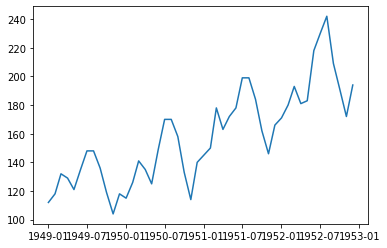

In [97]:
import matplotlib.pylab as plt
%matplotlib inline 
plt.plot(data)

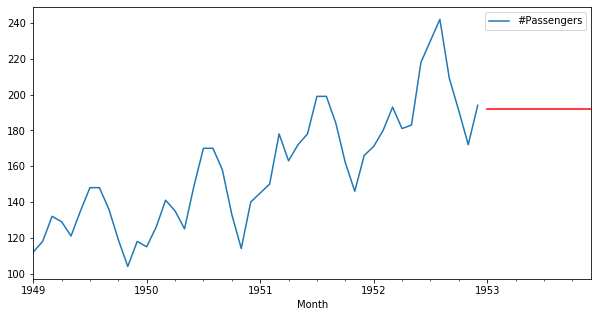

In [103]:
# single exponential smoothing

model = SimpleExpSmoothing(data)

model_fit = model.fit(smoothing_level = 0.9,optimized = False)
predy = model_fit.forecast(12)
# print(predy)
# print(data[36:48])
data.plot(kind = "line",figsize=(10,5))
predy.plot(kind = "line",figsize=(10,5),color = 'red')

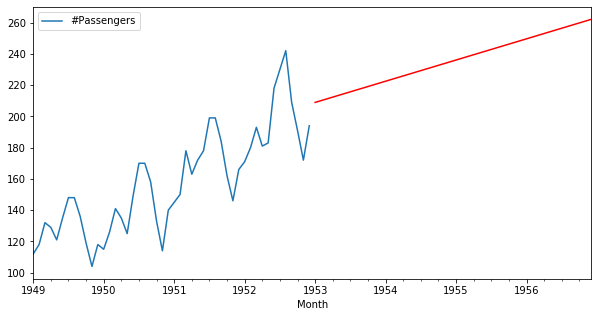

In [109]:
model = Holt(data)
# fit model
model_fit = model.fit(smoothing_level = 0.2,smoothing_slope = 0.2,optimized = False)
# make prediction
predy2= model_fit.forecast(len(data))
data.plot(kind = "line",figsize=(10,5))
predy2.plot(kind = "line",figsize=(10,5),color = 'red')

In [120]:
np.seterr(divide = 'ignore') 


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

dataset = pd.read_csv('Air.csv',parse_dates=['Month'],index_col='Month',date_parser=dateparse)

ds = dataset['#Passengers']
ds.head()




my_data = np.log(ds)

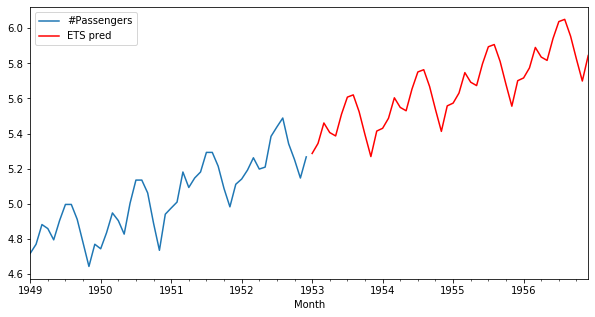

In [121]:
fit = ExponentialSmoothing((my_data) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1 = fit.forecast(len(my_data))

my_data.plot(kind="line",figsize=(10,5),legend=True)
fit1.plot(kind="line",figsize=(10,5),color='red',legend=True,label='ETS pred')